# CUSTOM CNN without bored class

In [1]:
# Import the Sequential model and layers
import tensorflow as tf
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv2D, Dropout, MaxPooling2D, BatchNormalization

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
import splitfolders #pip installsplit-folders
if not os.path.exists('dataset3/train'):
    splitfolders.ratio('C:/Users/mysan/OneDrive/Desktop/c_data/NEW CONSTRUCTED/FINAL_CONV5/', output="dataset4", seed=1337, ratio=(0.7, 0.2, 0.1))

Copying files: 37100 files [02:24, 256.97 files/s]


Found 27720 images belonging to 4 classes.


,Emotion,Total Value
0,CONFUSED,4690
1,DELIGHT,7072
2,FRUSTRATED,8418
3,NEUTRAL,7540


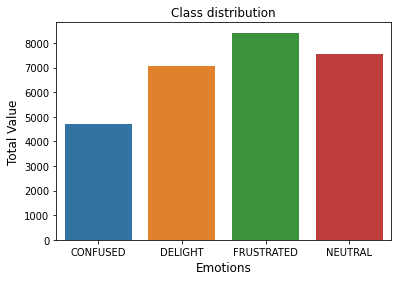

In [2]:
#Total Data
datagen_d = ImageDataGenerator()
totaldata = datagen_d.flow_from_directory('C:/Users/mysan/OneDrive/Desktop/c_data/NEW CONSTRUCTED/FINAL_CONV5/')

emotion_map = {0 : 'CONFUSED', 1 : 'DELIGHT', 2 : 'FRUSTRATED', 3 : 'NEUTRAL'}
emotion_counts = pd.Series(totaldata.classes).value_counts(sort=False).reset_index()
emotion_counts.columns = ['Emotion', 'Total Value']
emotion_counts['Emotion'] = emotion_counts['Emotion'].map(emotion_map)
display(emotion_counts)

import seaborn as sns
# Plotting a bar graph of the class distributions
plt.figure(figsize=(6,4))
sns.barplot(x = "Emotion", y = "Total Value",data=emotion_counts)
plt.title('Class distribution')
plt.ylabel('Total Value', fontsize=12)
plt.xlabel('Emotions', fontsize=12)
plt.show()

In [3]:
batch_size = 32

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   horizontal_flip = True)

val_datagen = ImageDataGenerator(rescale= 1./255)

test_datagen = ImageDataGenerator(rescale= 1./255)

# Generates batches of Augmented Image data
print("train_generator")
train_generator = train_datagen.flow_from_directory('dataset3/train/', target_size = (160, 160), 
                                                        batch_size = batch_size,
                                                        class_mode = 'sparse') 
# Generator for validation data
print("\nvalidation_generator")
validation_generator = val_datagen.flow_from_directory('dataset3/val/', 
                                                        target_size = (160, 160),
                                                        batch_size = batch_size,
                                                        class_mode = 'sparse')

train_generator
Found 19403 images belonging to 4 classes.

validation_generator
Found 5543 images belonging to 4 classes.


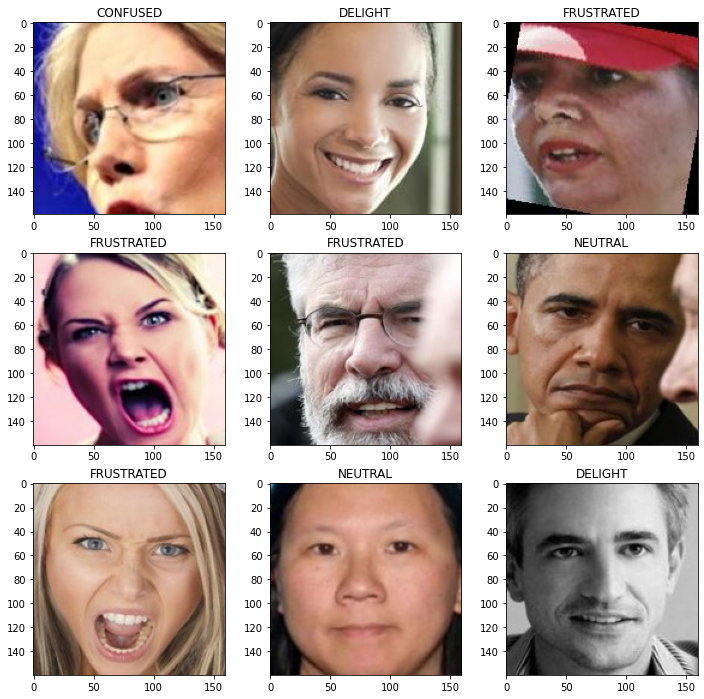

In [4]:
import matplotlib.pyplot as plt

class_names = {0 : 'CONFUSED', 1 : 'DELIGHT', 2 : 'FRUSTRATED', 3 : 'NEUTRAL'}

plt.figure(figsize=(12, 12))
for i in range(9):
    images, labels = train_generator.next()
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(class_names[labels[i]])
    plt.axis("on")

In [5]:
NUM_CLASSES = 4

from keras import layers


# Model
model = Sequential()
# Add convolution 2D
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu', padding="same",
        kernel_initializer='he_normal',input_shape=(160, 160, 3)),)
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
# Add dropouts to the model
model.add(Dropout(0.3))
model.add(Conv2D(64, kernel_size=(3, 3), strides=2,padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), strides=2,padding='same', activation='relu'))
# Add dropouts to the model
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
# Add dropouts to the model
model.add(Dropout(0.3))
model.add(Dense(NUM_CLASSES, activation='softmax'))

#Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 160, 160, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 160, 160, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 158, 158, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 158, 158, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 79, 79, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 39, 39, 32)       0

In [6]:
model.compile(loss = tf.keras.losses.sparse_categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])

In [7]:
#Learning Rate
from keras.callbacks import ReduceLROnPlateau
lrr= ReduceLROnPlateau(monitor='val_accuracy',   factor=.01,   patience=3,  min_lr=1e-5)

In [8]:
#Defining the parameters
#batch_size= 100
epochs=100 #100
#learn_rate=.001

In [9]:
#Training the model
history = model.fit(train_generator, epochs = epochs, steps_per_epoch = len(train_generator)//batch_size, validation_data = validation_generator, callbacks = [lrr], verbose=1)
# Evaluating model performance on Testing data
loss, accuracy = model.evaluate(validation_generator)

print("\nModel's Evaluation Metrics: ")
print("---------------------------")
print("Accuracy: {:,.2f} % \nLoss: {:,.2f} %".format(accuracy*100, loss*100))

#on FINAL_CONV3
#Accuracy: 79.98 % 
#Loss: 60.64 %

#on FINAL_CONV4
#Accuracy: 86.70 % 
#Loss: 38.32 %

Epoch 1/100
25/25 [==============================] - 34s 1s/step - loss: 1.4551 - accuracy: 0.3475 - val_loss: 49.6371 - val_accuracy: 0.2033 - lr: 0.0010
Epoch 2/100
25/25 [==============================] - 8s 338ms/step - loss: 1.1724 - accuracy: 0.4588 - val_loss: 9.0630 - val_accuracy: 0.2243 - lr: 0.0010
Epoch 3/100
25/25 [==============================] - 8s 334ms/step - loss: 1.0536 - accuracy: 0.5475 - val_loss: 2.7933 - val_accuracy: 0.2929 - lr: 0.0010
Epoch 4/100
25/25 [==============================] - 8s 334ms/step - loss: 0.9389 - accuracy: 0.6438 - val_loss: 2.5286 - val_accuracy: 0.2434 - lr: 0.0010
Epoch 5/100
25/25 [==============================] - 8s 332ms/step - loss: 0.8322 - accuracy: 0.6750 - val_loss: 1.5179 - val_accuracy: 0.4139 - lr: 0.0010
Epoch 6/100
25/25 [==============================] - 8s 335ms/step - loss: 0.8765 - accuracy: 0.6662 - val_loss: 1.1190 - val_accuracy: 0.5704 - lr: 0.0010
Epoch 7/100
25/25 [==============================] - 8s 322ms/ste

# Model Accuracy

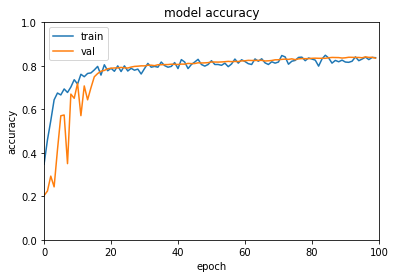

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.xlim([0, epochs])
plt.ylim([0, 1])
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Model Loss

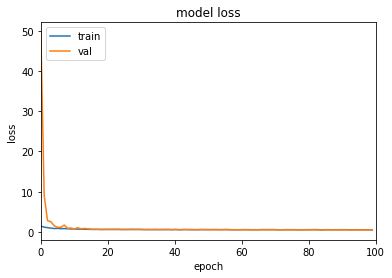

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.xlim([0, epochs])
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [14]:
# serialize model to JSON
model_json = model.to_json()
with open("modeltemp/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("modeltemp/model.h5")
print("Saved model to disk")

Saved model to disk


# CONFUSION MATRIX

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size = 3459
test_datagen = ImageDataGenerator(rescale= 1./255)
# Generator for test data
print("\ntest_generator")
test_generator = test_datagen.flow_from_directory('dataset3/test/', 
                                                        target_size = (160, 160),
                                                        batch_size = batch_size,
                                                        class_mode = 'sparse')


test_generator
Found 3459 images belonging to 4 classes.


In [8]:
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
correct_prediction = pd.DataFrame(columns=['ImageArray', 'Actual_label', 'Predicted_label','Target'])
false_prediction = pd.DataFrame(columns=['ImageArray', 'Actual_label', 'Predicted_label','Target'])
class_names = {0 : 'CONFUSED', 1 : 'DELIGHT', 2 : 'FRUSTRATED', 3 : 'NEUTRAL'}
pred = []
# predict first 9 images in Test image
plt.figure(figsize=(12, 14))
images, actlabel = test_generator.next()
for i in range(len(test_generator)):
    with tf.device('gpu:0'):
        predict_x=emotion_model.predict(images) 
    labels=np.argmax(predict_x,axis=1)
    for j in tqdm(range(len(labels))):
        pred.append(labels[j])
        if class_names[labels[j]] == class_names[actlabel[j]]:
            correct_prediction = correct_prediction.append({'ImageArray': (images[j]), 'Actual_label': (class_names[actlabel[j]]), 'Predicted_label': (class_names[labels[j]]), 'Target': 'True'}, ignore_index=True)
        else:
            false_prediction = false_prediction.append({'ImageArray': (images[j]), 'Actual_label': (class_names[actlabel[j]]), 'Predicted_label': (class_names[labels[j]]), 'Target': 'False'}, ignore_index=True)

109/109 [==============================] - 1s 10ms/step


100%|██████████| 3459/3459 [00:05<00:00, 597.01it/s]


<Figure size 864x1008 with 0 Axes>

In [ ]:
import cv2
import numpy as np
#from keras.models import model_from_json
from PIL import Image
from tqdm import tqdm
import shutil

import tensorflow as tf


config = tf.compat.v1.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.2 ##
config.gpu_options.allow_growth=False # True
sess = tf.compat.v1.Session(config=config)

tf.compat.v1.keras.backend.set_session(sess)
from tensorflow.compat.v1.keras.models import model_from_json


emotion_dict = {0 : 'CONFUSED', 1 : 'DELIGHT', 2 : 'FRUSTRATED', 3 : 'NEUTRAL'}

# load json and create model
json_file = open('modeltemp/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)

# load weights into new model
emotion_model.load_weights("modeltemp/model.h5")
print("Loaded model from disk")

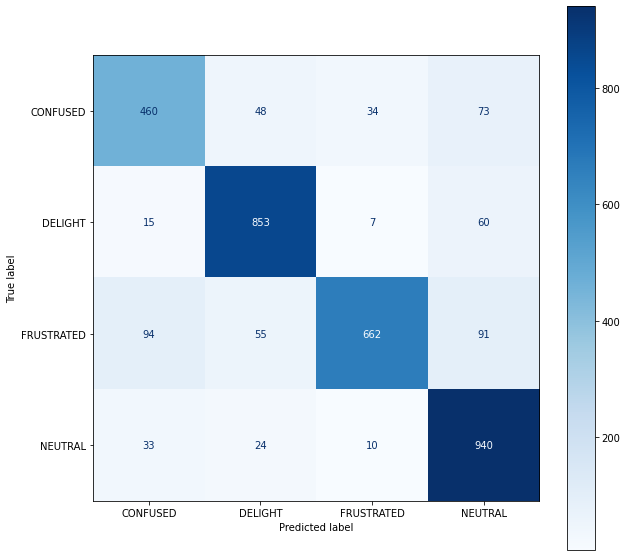

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

y_pred = np.array(pred)
y_test = np.array(actlabel)
labels = ['CONFUSED', 'DELIGHT', 'FRUSTRATED', 'NEUTRAL']

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)


fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax,cmap=plt.cm.Blues)